In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cp '/content/drive/MyDrive/CW_Dataset.zip' '/content/'
%cd '/content'
!unzip 'CW_Dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: CW_Dataset/train/train_07272_aligned.jpg  
  inflating: CW_Dataset/train/train_07273_aligned.jpg  
  inflating: CW_Dataset/train/train_07274_aligned.jpg  
  inflating: CW_Dataset/train/train_07275_aligned.jpg  
  inflating: CW_Dataset/train/train_07276_aligned.jpg  
  inflating: CW_Dataset/train/train_07277_aligned.jpg  
  inflating: CW_Dataset/train/train_07278_aligned.jpg  
  inflating: CW_Dataset/train/train_07279_aligned.jpg  
  inflating: CW_Dataset/train/train_07280_aligned.jpg  
  inflating: CW_Dataset/train/train_07281_aligned.jpg  
  inflating: CW_Dataset/train/train_07282_aligned.jpg  
  inflating: CW_Dataset/train/train_07283_aligned.jpg  
  inflating: CW_Dataset/train/train_07284_aligned.jpg  
  inflating: CW_Dataset/train/train_07285_aligned.jpg  
  inflating: CW_Dataset/train/train_07286_aligned.jpg  
  inflating: CW_Dataset/train/train_07287_aligned.jpg  
  inflating: CW_Dataset/train/train_07288_aligned.jpg

In [ ]:
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np
import pandas as  pd
import os

#Reading images into a single array
train_path = 'CW_Dataset/train/'
test_path = 'CW_Dataset/test/'
train_labels = 'CW_Dataset/labels/list_label_train.txt'
test_labels = 'CW_Dataset/labels/list_label_test.txt'

X_train,y_train = [],[]
X_test,y_test = [],[]

train_labels = pd.read_csv(train_labels,sep=' ',header=None)
train_labels = train_labels.set_index(0)
train_labels.columns = ['label']

test_labels = pd.read_csv(test_labels,sep=' ',header=None)
test_labels = test_labels.set_index(0)
test_labels.columns = ['label']

print("Reading Training images...")
for img in os.listdir(train_path):
  img_path = os.path.join(train_path,img)
  if img_path.endswith('.jpg'):
    X_train.append(cv2.imread(img_path))
    p = img.split('_aligned')[0]+'.jpg'
    y_train.append(train_labels.loc[p].values[0])

print("Reading Test images...")
for img in os.listdir(test_path):
  img_path = os.path.join(test_path,img)
  if img_path.endswith('.jpg'):
    X_test.append(cv2.imread(img_path))
    p = img.split('_aligned')[0]+'.jpg'
    y_test.append(test_labels.loc[p].values[0])

X_train,X_test = np.array(X_train),np.array(X_test)
y_train,y_test = np.array(y_train),np.array(y_test)


print("Done!")

Reading Training images...
Reading Test images...
Done!


In [ ]:
print((X_train.shape))
print((y_train.shape))
print((X_test.shape))
print((y_test.shape))

(12271, 100, 100, 3)
(12271,)
(3068, 100, 100, 3)
(3068,)


In [ ]:
#One Hot Encoding converting labels into binary vectors
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [ ]:
IMAGE_WIDTH, IMAGE_HEIGHT = 100,100
BATCH_SIZE = 32
EPOCHS = 30

In [ ]:
#Convolutional neural network (CNN) model for emotion recognition using the Keras library with a TensorFlow backend.
#The model consists of convolutional layers, max-pooling and fully connected layers.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

emotion_model = Sequential()
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(100,100,3)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Flatten())
emotion_model.add(Dense(512, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

emotion_model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])
model =emotion_model
model.summary()

In [ ]:
#We fit thee training data (X_train, y_train) for the specified number of epochs (EPOCHS). The validation data (X_test, y_test) is used to evaluate the model's performance after each epoch. The batch_size parameter determines the number of samples used in each update of the model weights.
#The training history is stored in the history object, which can be used to analyze the training and validation metrics over the epochs.

history = model.fit(X_train, y_train, epochs=EPOCHS,  validation_data = (X_test,y_test),batch_size = BATCH_SIZE)

Epoch 1/30
384/384 [==============================] - 27s 69ms/step - loss: 2.3608 - accuracy: 0.4666 - val_loss: 1.1375 - val_accuracy: 0.6007
Epoch 2/30
384/384 [==============================] - 27s 70ms/step - loss: 1.1262 - accuracy: 0.6010 - val_loss: 0.9741 - val_accuracy: 0.6447
Epoch 3/30
384/384 [==============================] - 26s 68ms/step - loss: 0.9521 - accuracy: 0.6661 - val_loss: 0.9352 - val_accuracy: 0.6646
Epoch 4/30
384/384 [==============================] - 27s 70ms/step - loss: 0.8268 - accuracy: 0.7113 - val_loss: 0.8332 - val_accuracy: 0.7080
Epoch 5/30
384/384 [==============================] - 26s 68ms/step - loss: 0.7245 - accuracy: 0.7499 - val_loss: 0.8651 - val_accuracy: 0.6959
Epoch 6/30
384/384 [==============================] - 27s 70ms/step - loss: 0.6157 - accuracy: 0.7823 - val_loss: 0.8013 - val_accuracy: 0.7161
Epoch 7/30
384/384 [==============================] - 26s 68ms/step - loss: 0.5216 - accuracy: 0.8196 - val_loss: 0.8039 - val_accuracy:

Text(0.5, 1.0, 'Loss Curves')

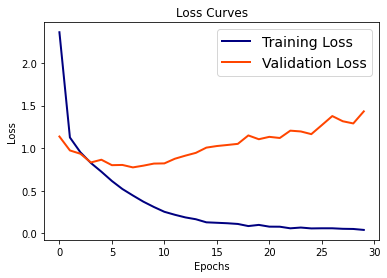

In [ ]:
#Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'navy', linewidth=2.0)
plt.plot(history.history['val_loss'], 'orangered', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

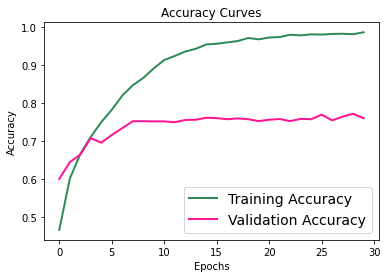

In [ ]:
#Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'seagreen', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'deeppink', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [ ]:
#Performance Analysis
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

target_names = ["Surprise","Fear","Disgust","Happiness","Sadness","Anger","Neutral"]

#Confusion Matrix and Classification Report
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
y_test = np.argmax(np.array(y_test),axis =1)
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))
print('Classification Report')
print(classification_report(y_test,y_pred, target_names=target_names))

Confusion Matrix
[[ 254    2    8   12   17    7   29]
 [  14   32    2    4    6    7    9]
 [   4    1   51   15   27   20   42]
 [   9    1   12 1045   32   15   71]
 [   7    4   11   47  314   15   80]
 [   9    2    2   19    8  106   16]
 [  27    2   10   37   66    8  530]]
Classification Report
              precision    recall  f1-score   support

    Surprise       0.78      0.77      0.78       329
        Fear       0.73      0.43      0.54        74
     Disgust       0.53      0.32      0.40       160
   Happiness       0.89      0.88      0.88      1185
     Sadness       0.67      0.66      0.66       478
       Anger       0.60      0.65      0.62       162
     Neutral       0.68      0.78      0.73       680

    accuracy                           0.76      3068
   macro avg       0.70      0.64      0.66      3068
weighted avg       0.76      0.76      0.76      3068



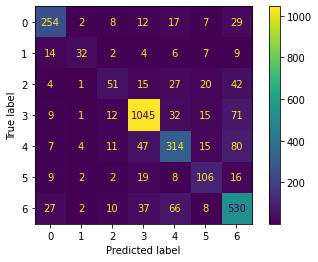

In [ ]:
#Confusion Matrix
from sklearn import metrics
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [ ]:
model.save('cnn_model.h5')

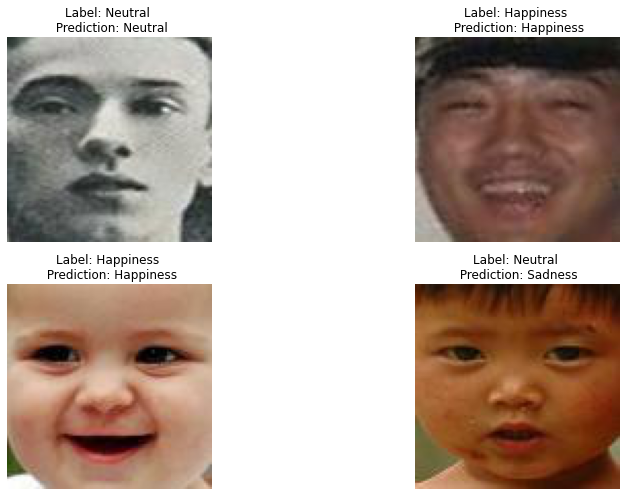

In [ ]:
#Model performance on randomly selected images from test set
import random
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
import keras

model = keras.models.load_model('cnn_model.h5')
path_to_testset = 'CW_Dataset/test/'
labels_path = 'CW_Dataset/labels/list_label_test.txt'

labels = pd.read_csv(labels_path,sep=' ',header=None)
labels = labels.set_index(0)
labels.columns = ['label']


fig, axes = plt.subplots(2, 2, figsize=(14, 7), sharex=True, sharey=True)
ax = axes.ravel()
for n in range(4):
    i = random.randint(1, len(labels) - 1)
    if i < 10:
        path = path_to_testset + 'test_000' + str(i + 1) + '.jpg'
    elif i < 100:
        path = path_to_testset + 'test_00' + str(i + 1) + '.jpg'
    elif i < 1000:
        path = path_to_testset + 'test_0' + str(i + 1) + '.jpg'
    elif i < 10000:
        path = path_to_testset + 'test_' + str(i + 1) + '.jpg'
    #p = path.split('/')[-1]
    p = path.split('.')[0]+'_aligned.jpg'
    path = path.split('/')[-1]
    label = labels.loc[path].values[0]
    img = io.imread(p)
    ax[n].imshow(img)
    emo_dict = {1: 'Surprise', 2: 'Fear', 3: 'Disgust', 4: 'Happiness', 5: 'Sadness', 6: 'Anger', 7: 'Neutral'}
    label = emo_dict[label]
    img = np.expand_dims(img,axis =0)

    out =emo_dict[1+np.argmax(model.predict(img))]

    ax[n].set_title(f'Label: {label} \n Prediction: {out}')
    ax[n].set_axis_off()
fig.tight_layout()
plt.show()